#**IMPORT LIBRARY**

In [ ]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

#**PREPORICESSING**

In [ ]:
df = pd.read_csv('/content/Fraud insurance_claims.csv')
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [ ]:
# we can see some missing values denoted by '?' so lets replace missing values with np.nan

df.replace('?', np.nan, inplace = True)

In [ ]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

#**Data Preprocessing**

In [ ]:
# missing values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

## **Visualize MIssing Value**

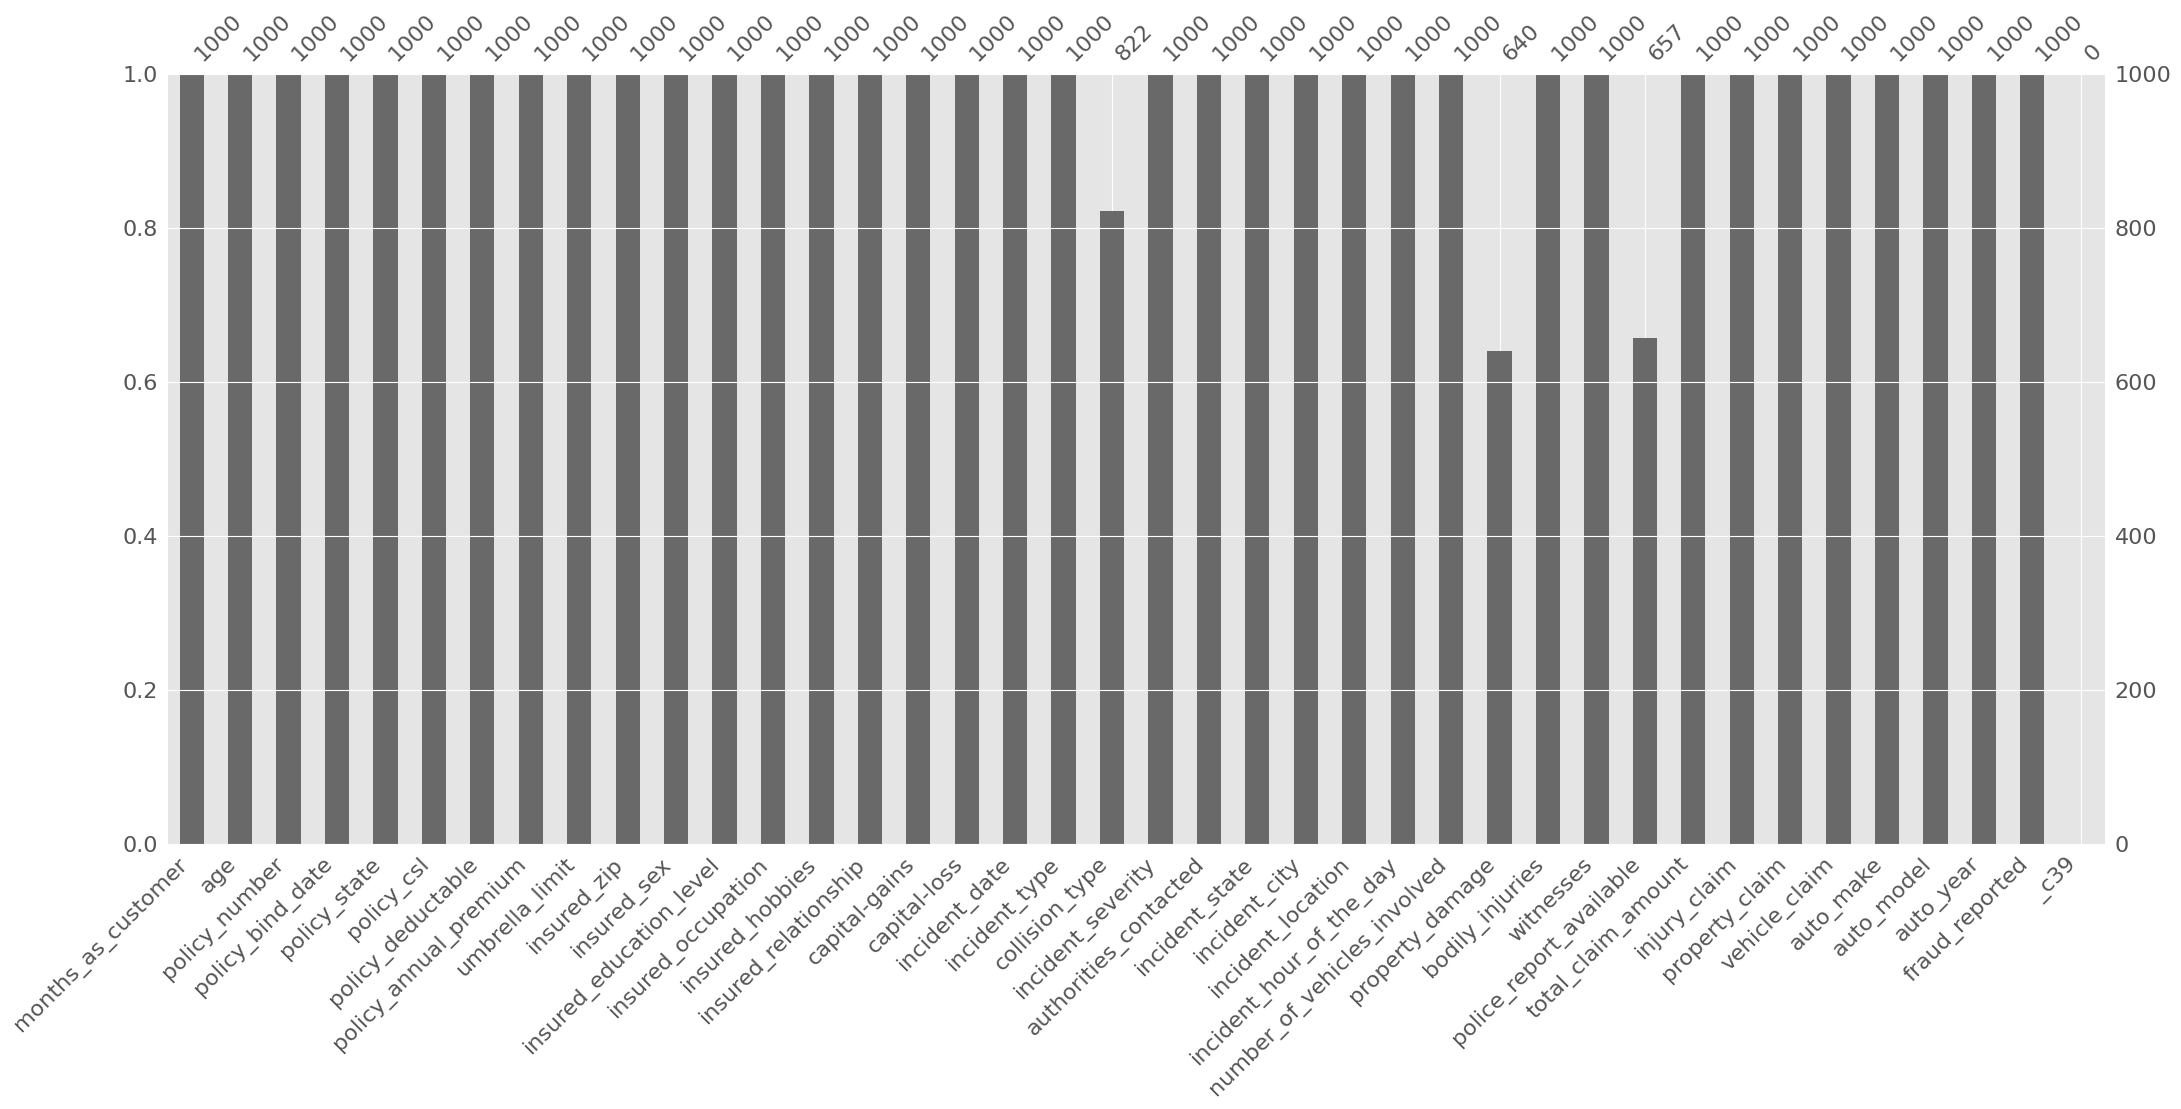

In [ ]:
import missingno as msno

msno.bar(df)
plt.show()

##**Handling Missing Value**

In [ ]:
# handling Missing Value with Mode at corelation Columns
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [ ]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

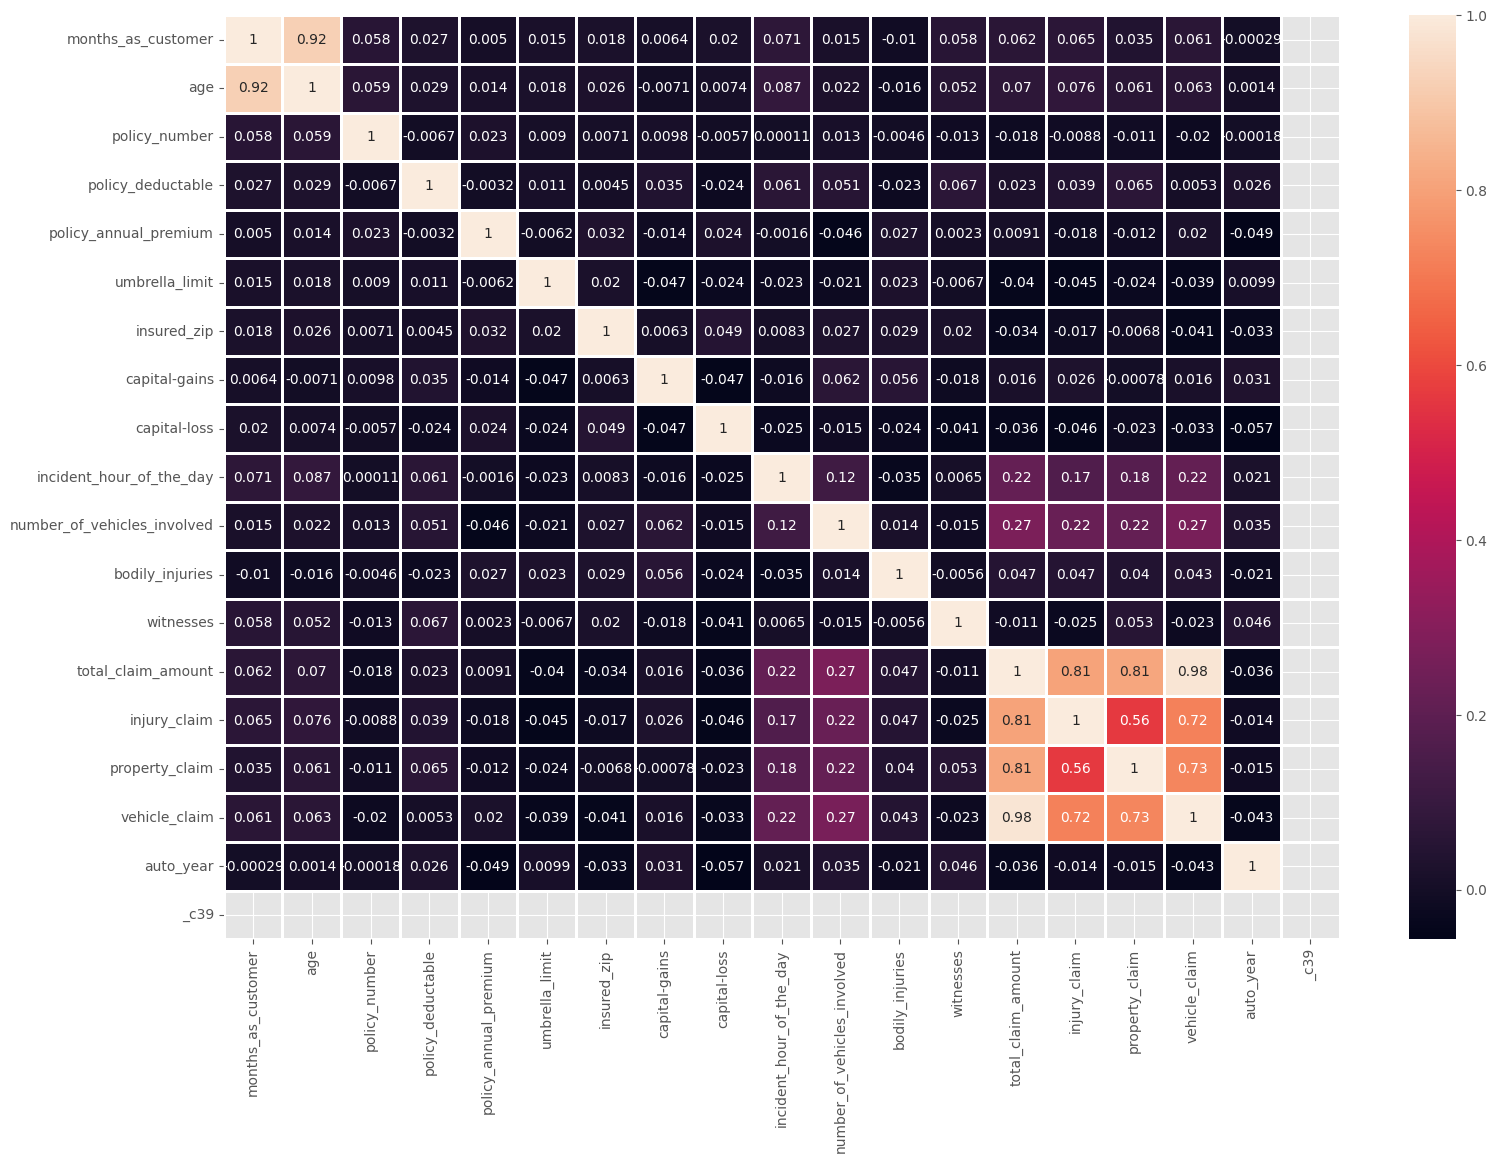

In [ ]:
# heatmap

plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [ ]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [ ]:
df.nunique()

months_as_customer              391
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries             

In [ ]:
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)

In [ ]:
df.head(10)

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N
5,256,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,unmarried,0,...,19,3,NO,0,2,NO,6410,6410,51280,Y
6,137,250/500,1000,1333.35,0,MALE,PhD,prof-specialty,husband,0,...,0,3,NO,0,0,NO,21450,7150,50050,N
7,165,100/300,1000,1137.03,0,MALE,Associate,tech-support,unmarried,0,...,23,3,NO,2,2,YES,9380,9380,32830,N
8,27,100/300,500,1442.99,0,FEMALE,PhD,other-service,own-child,0,...,21,1,NO,1,1,YES,2770,2770,22160,N
9,212,100/300,500,1315.68,0,MALE,PhD,priv-house-serv,wife,0,...,14,1,NO,2,1,NO,4700,4700,32900,N


In [ ]:
# separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

#**Encoding Nonnumerik Variable**

In [ ]:
# extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])

In [ ]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO


In [ ]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [ ]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [ ]:
# extracting the numerical columns

num_df = X.select_dtypes(include = ['int64'])

In [ ]:
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [ ]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, cat_df], axis = 1)

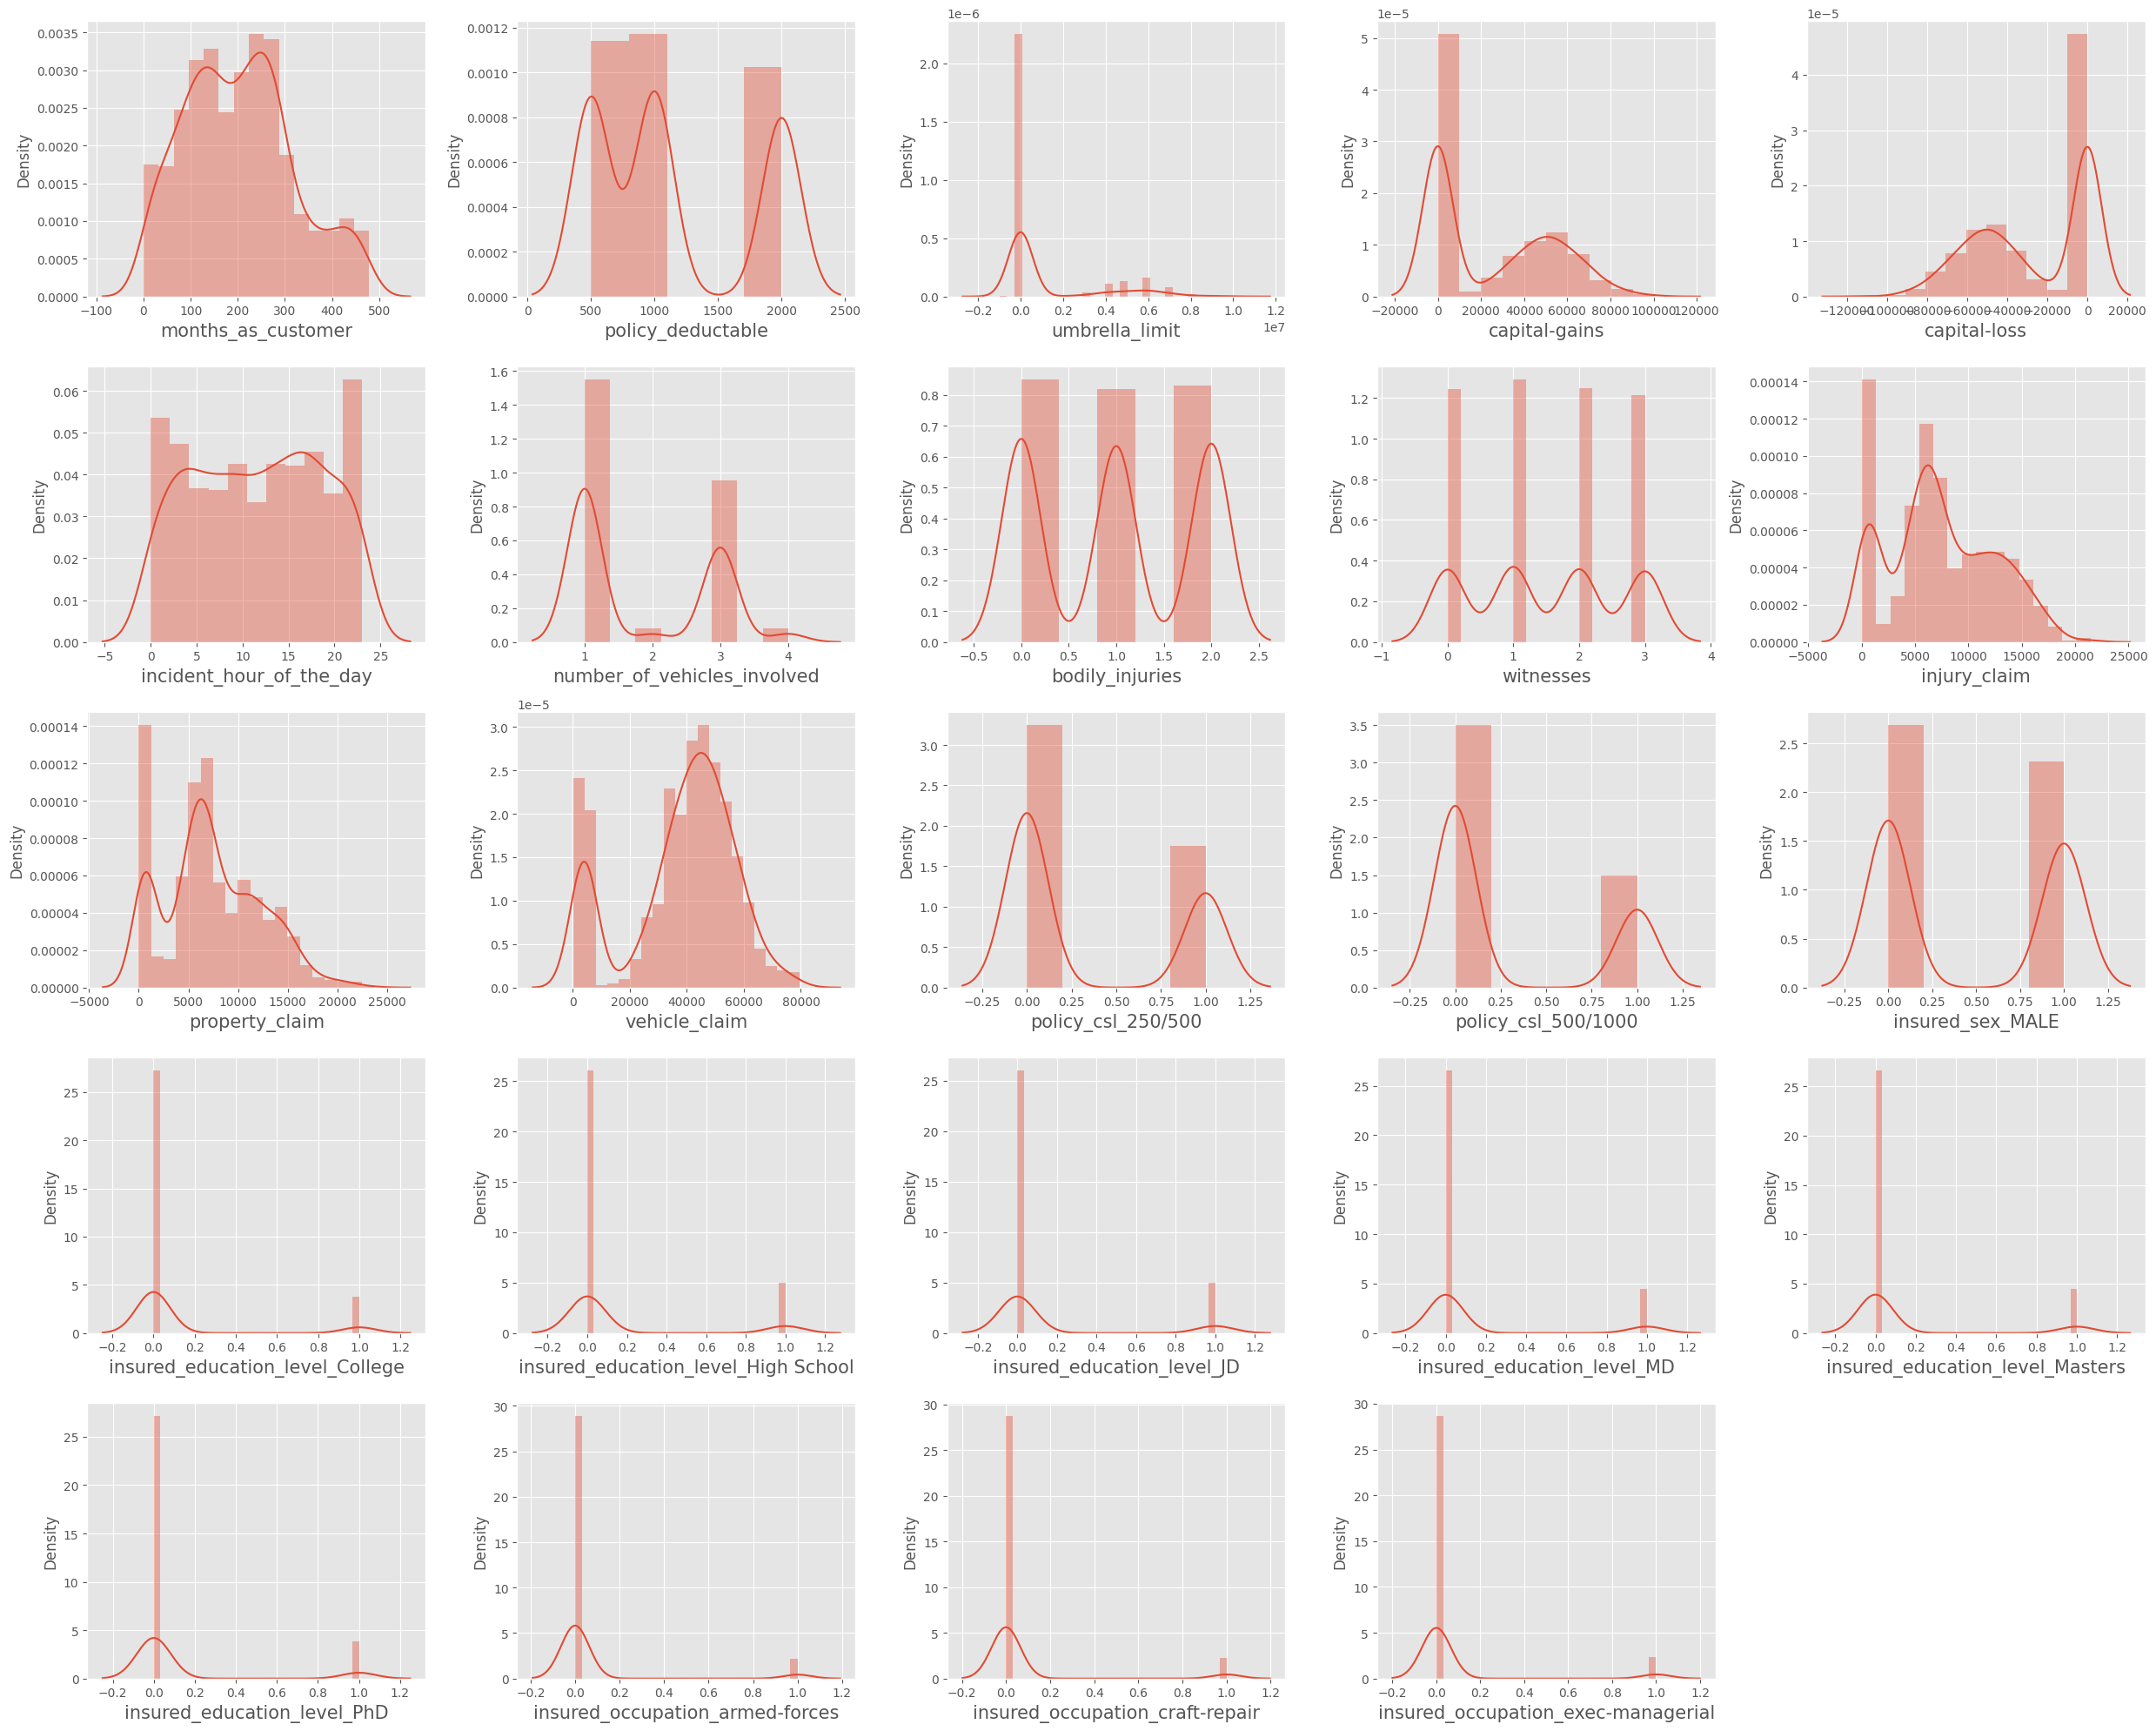

In [ ]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
X_scaled = X[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]


In [ ]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_scaled)

In [ ]:
X_scaled = pd.DataFrame(data = scaled_data, columns = X_scaled.columns, index = X_scaled.index)
X_scaled.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,1.078140,-0.222383,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,-0.189283,1.165505,0.749653
1,0.208995,1.412784,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.363822,-1.372696,-1.823346
2,-0.608002,1.412784,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,0.054644,-0.736072,-0.785565
3,0.452355,1.412784,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,-0.224130,-0.219722,0.677607
4,0.208995,-0.222383,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.257232,-1.399654,-1.768252


In [ ]:
X.drop(columns = X_scaled.columns, inplace = True)
X = pd.concat([X_scaled, X], axis = 1)
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1.078140,-0.222383,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,-0.189283,...,1,0,0,0,0,0,0,1,1,1
1,0.208995,1.412784,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.363822,...,0,1,0,0,0,0,0,1,0,0
2,-0.608002,1.412784,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,0.054644,...,0,1,0,0,0,0,0,1,0,0
3,0.452355,1.412784,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,-0.224130,...,0,0,0,0,0,0,0,1,0,0
4,0.208995,-0.222383,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.257232,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
X.shape

(1000, 53)

#**Outlier Detection**

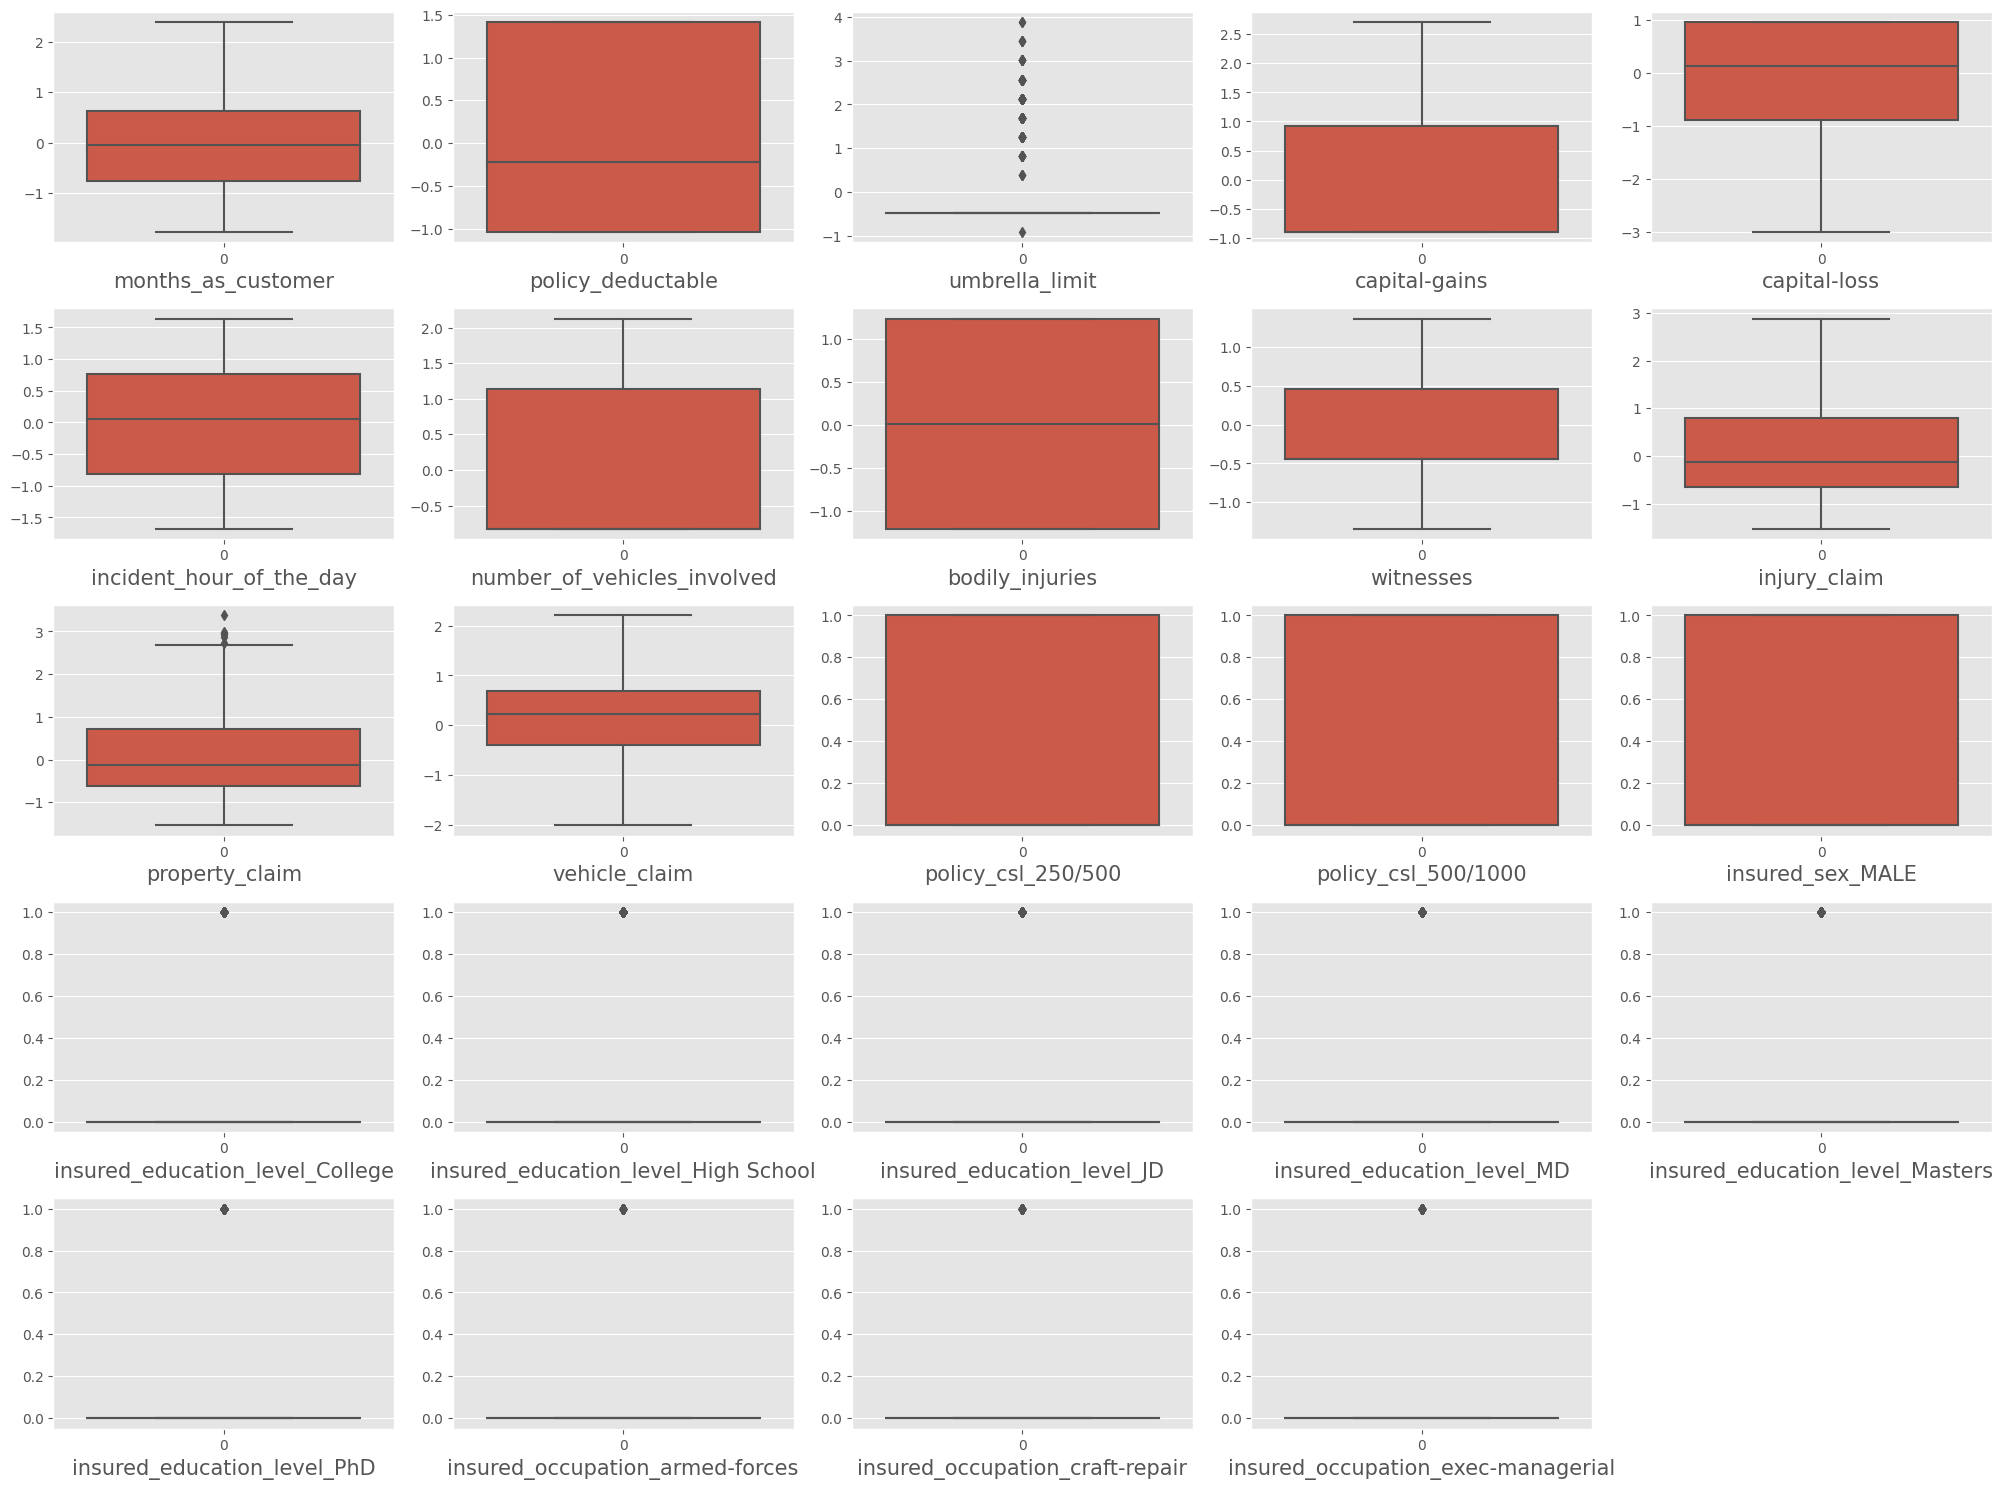

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

In [ ]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

#**Models**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

def compare_classifiers(X, y):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Create a list of classifiers to compare
    classifiers = [
        ('Random Forest', RandomForestClassifier()),
        ('Logistic Regression', LogisticRegression(random_state=42)),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Support Vector Machine', SVC(random_state=42)),
        ('Gaussian Naive Bayes', GaussianNB()),
        ('Multi-layer Perceptron', MLPClassifier(random_state=42)),
        ('AdaBoost', AdaBoostClassifier(random_state=42)),
        ('Decision Tree', DecisionTreeClassifier(random_state=42)),
        ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
    ]

    # Initialize lists to store metric values
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    # Evaluate each classifier and store the metric values
    for name, classifier in classifiers:
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))

    # Create the comparison graph
    x_labels = [name for name, _ in classifiers]
    x_pos = np.arange(len(x_labels))

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    bars = plt.bar(x_pos, accuracy_scores, align='center', alpha=0.8)
    plt.xticks(x_pos, x_labels, rotation=45)
    plt.ylabel('Accuracy')
    plt.title('Classifier Comparison - Accuracy')
    for bar, acc in zip(bars, accuracy_scores):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(acc, 2), ha='center', va='bottom')

    plt.subplot(2, 2, 2)
    bars = plt.bar(x_pos, precision_scores, align='center', alpha=0.8)
    plt.xticks(x_pos, x_labels, rotation=45)
    plt.ylabel('Precision')
    plt.title('Classifier Comparison - Precision')
    for bar, prec in zip(bars, precision_scores):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(prec, 2), ha='center', va='bottom')

    plt.subplot(2, 2, 3)
    bars = plt.bar(x_pos, recall_scores, align='center', alpha=0.8)
    plt.xticks(x_pos, x_labels, rotation=45)
    plt.ylabel('Recall')
    plt.title('Classifier Comparison - Recall')
    for bar, rec in zip(bars, recall_scores):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(rec, 2), ha='center', va='bottom')

    plt.subplot(2, 2, 4)
    bars = plt.bar(x_pos, f1_scores, align='center', alpha=0.8)
    plt.xticks(x_pos, x_labels, rotation=45)
    plt.ylabel('F1 Score')
    plt.title('Classifier Comparison - F1 Score')
    for bar, f1 in zip(bars, f1_scores):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(f1, 2), ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig('classifier_comparison.png', dpi=300)
    plt.show()

# Contoh penggunaan:
# X dan y merupakan data dan label dari dataset yang ingin digunakan
# compare_classifiers(X, y)


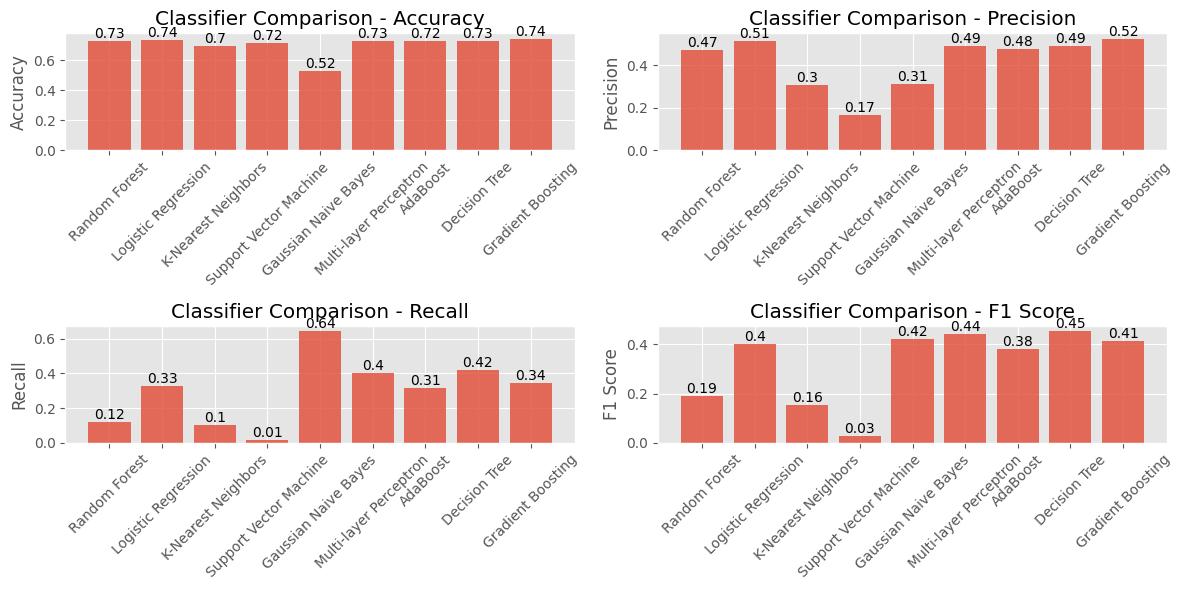

In [ ]:
compare_classifiers(X, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

In [ ]:
!pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and fit the LazyClassifier
lazy_clf = LazyClassifier(predictions=True)
models, predictions = lazy_clf.fit(X_train, X_test, y_train, y_test)
# Tampilkan hasil
print(models)
print(predictions)

100%|██████████| 29/29 [00:03<00:00,  8.27it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearDiscriminantAnalysis         0.78               0.72     0.72      0.78   
RidgeClassifier                    0.76               0.68     0.68      0.76   
RidgeClassifierCV                  0.76               0.67     0.67      0.75   
LGBMClassifier                     0.77               0.65     0.65      0.75   
PassiveAggressiveClassifier        0.74               0.65     0.65      0.74   
LinearSVC                          0.75               0.64     0.64      0.74   
BaggingClassifier                  0.76               0.63     0.63      0.74   
DecisionTreeClassifier             0.73               0.63     0.63      0.72   
NearestCentroid                    0.61               0.62     0.62      0.63   
XGBClassifier                      0.75               0.62     0.62      0.73   
LogisticRegression          

In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=830e6a00d6cb3a02444195900cd4f09ce6ae3f9dc48c2b5665522f58822d5f78
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
# Convert 'Y' to 1 and 'N' to 0 in the y variable
y = pd.Series(y).map({'Y': 1, 'N': 0}).values
y.shape

(1000,)

In [ ]:
X_new = X.copy()
y_new = y.copy()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
from pyswarm import pso

# Load the Iris dataset from sklearn
X,y = X_new.values,y_new

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_features(selected_features):
    """
    Function to evaluate the F1 score of the selected features using Random Forest classifier.

    Parameters:
        selected_features (array-like): Binary array indicating selected features.

    Returns:
        f1_score (float): F1 score of the Random Forest classifier.
    """
    # Convert selected_features to boolean mask
    selected_mask = np.array(selected_features, dtype=bool)
    # Select the features based on the mask
    X_train_selected = X_train[:, selected_mask]
    X_test_selected = X_test[:, selected_mask]

    # Create and train the Random Forest classifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_selected, y_train)

    # Make predictions and calculate F1 score
    y_pred = clf.predict(X_test_selected)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted F1 score for multi-class problems
    return -f1  # We use -f1 since PSO minimizes the objective function

# Define the lower and upper bounds for the binary features
lower_bound = [0] * X_train.shape[1]
upper_bound = [1] * X_train.shape[1]

# Perform Binary Particle Swarm Optimization
best_features, _ = pso(evaluate_features, lower_bound, upper_bound, swarmsize=10, maxiter=50)

# Convert the best_features to a boolean mask
best_mask = np.array(best_features, dtype=bool)

Stopping search: maximum iterations reached --> 50


In [ ]:
final_selected_features_X = X_new
final_selected_features_y = y_new
X_train, X_test, y_train, y_test = train_test_split(final_selected_features_X, final_selected_features_y, test_size = 0.25)
# Train the classifier using the selected features
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the F1 score on the test set
f1_test_score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score on Test Set:", f1_test_score)

# Print the classification report
target_names = ['N', 'Y']  # Replace with your class names if needed
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

F1 Score on Test Set: 0.7903247058823528

Confusion Matrix:
[[189  13]
 [ 34  14]]

Classification Report:
              precision    recall  f1-score   support

           N       0.85      0.94      0.89       202
           Y       0.52      0.29      0.37        48

    accuracy                           0.81       250
   macro avg       0.68      0.61      0.63       250
weighted avg       0.78      0.81      0.79       250



In [ ]:
final_selected_features_X = X[:, best_mask]
final_selected_features_y = y_new
X_train, X_test, y_train, y_test = train_test_split(final_selected_features_X, final_selected_features_y, test_size = 0.25)
# Train the classifier using the selected features
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the F1 score on the test set
f1_test_score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score on Test Set:", f1_test_score)

# Print the classification report
target_names = ['N', 'Y']  # Replace with your class names if needed
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

F1 Score on Test Set: 0.7261199633699633

Confusion Matrix:
[[179  10]
 [ 48  13]]

Classification Report:
              precision    recall  f1-score   support

           N       0.79      0.95      0.86       189
           Y       0.57      0.21      0.31        61

    accuracy                           0.77       250
   macro avg       0.68      0.58      0.59       250
weighted avg       0.73      0.77      0.73       250



In [ ]:
split = [0.1, 0.2, 0.25, 0.4, 0.45, 0.5]
for i in split:
  print('Hasil ke-' + str(i)+"\n")
  final_selected_features_X = X_new
  final_selected_features_y = y_new
  X_train, X_test, y_train, y_test = train_test_split(final_selected_features_X, final_selected_features_y, test_size = i)
  # Train the classifier using the selected features
  clf = RandomForestClassifier()
  clf.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = clf.predict(X_test)

  # Calculate the F1 score on the test set
  f1_test_score = f1_score(y_test, y_pred, average='weighted')
  print("F1 Score on Test Set:", f1_test_score)

  # Print the classification report
  target_names = ['N', 'Y']  # Replace with your class names if needed
  print("\nConfusion Matrix:")
  print(confusion_matrix(y_test, y_pred))
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred, target_names=target_names))


Hasil ke-0.1

F1 Score on Test Set: 0.6992857142857142

Confusion Matrix:
[[72  2]
 [22  4]]

Classification Report:
              precision    recall  f1-score   support

           N       0.77      0.97      0.86        74
           Y       0.67      0.15      0.25        26

    accuracy                           0.76       100
   macro avg       0.72      0.56      0.55       100
weighted avg       0.74      0.76      0.70       100

Hasil ke-0.2

F1 Score on Test Set: 0.7198096326855211

Confusion Matrix:
[[148   5]
 [ 40   7]]

Classification Report:
              precision    recall  f1-score   support

           N       0.79      0.97      0.87       153
           Y       0.58      0.15      0.24        47

    accuracy                           0.78       200
   macro avg       0.69      0.56      0.55       200
weighted avg       0.74      0.78      0.72       200

Hasil ke-0.25

F1 Score on Test Set: 0.7320835570078189

Confusion Matrix:
[[181   8]
 [ 48  13]]

Classific

In [ ]:
split = [0.1, 0.2, 0.25, 0.4, 0.45, 0.5]
for i in split:
  print('Hasil ke-' + str(i)+"\n")
  final_selected_features_X = X_new.values[:, best_mask]
  final_selected_features_y = y_new
  X_train, X_test, y_train, y_test = train_test_split(final_selected_features_X, final_selected_features_y, test_size = i)
  # Train the classifier using the selected features
  clf = RandomForestClassifier()
  clf.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = clf.predict(X_test)

  # Calculate the F1 score on the test set
  f1_test_score = f1_score(y_test, y_pred, average='weighted')
  print("F1 Score on Test Set:", f1_test_score)

  # Print the classification report
  target_names = ['N', 'Y']  # Replace with your class names if needed
  print("\nConfusion Matrix:")
  print(confusion_matrix(y_test, y_pred))
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred, target_names=target_names))


Hasil ke-0.1

F1 Score on Test Set: 0.7797993311036789

Confusion Matrix:
[[70  8]
 [13  9]]

Classification Report:
              precision    recall  f1-score   support

           N       0.84      0.90      0.87        78
           Y       0.53      0.41      0.46        22

    accuracy                           0.79       100
   macro avg       0.69      0.65      0.67       100
weighted avg       0.77      0.79      0.78       100

Hasil ke-0.2

F1 Score on Test Set: 0.6521538461538461

Confusion Matrix:
[[134   7]
 [ 50   9]]

Classification Report:
              precision    recall  f1-score   support

           N       0.73      0.95      0.82       141
           Y       0.56      0.15      0.24        59

    accuracy                           0.71       200
   macro avg       0.65      0.55      0.53       200
weighted avg       0.68      0.71      0.65       200

Hasil ke-0.25

F1 Score on Test Set: 0.7073851014704094

Confusion Matrix:
[[182   4]
 [ 54  10]]

Classific

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
final_selected_features_X = X_new.values
final_selected_features_y = y_new
# Assuming i is defined as the test_size value for train_test_split (e.g., i = 0.2 for 20% test set)
# If not, you can define the desired number of folds (e.g., n_splits = 5 for 5-fold cross-validation)

# Perform k-fold cross-validation
n_splits = 10  # You can adjust the number of folds as needed
kf = KFold(n_splits=n_splits, shuffle=True)

f1_scores = []

for train_index, test_index in kf.split(final_selected_features_X):
    X_train, X_test = final_selected_features_X[train_index], final_selected_features_X[test_index]
    y_train, y_test = final_selected_features_y[train_index], final_selected_features_y[test_index]

    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    f1_test_score = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1_test_score)

    print("\nFold Results:")
    print("F1 Score on Test Set:", f1_test_score)
    #print("Confusion Matrix:")
    #print(confusion_matrix(y_test, y_pred))
    #print("Classification Report:")
    #print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate and print the average F1 score over all folds
avg_f1_score = sum(f1_scores) / len(f1_scores)
print("\nAverage F1 Score over", n_splits, "folds:", avg_f1_score)



Fold Results:
F1 Score on Test Set: 0.6992857142857142

Fold Results:
F1 Score on Test Set: 0.7124451231150983

Fold Results:
F1 Score on Test Set: 0.7531818935499918

Fold Results:
F1 Score on Test Set: 0.6932142857142857

Fold Results:
F1 Score on Test Set: 0.6661818181818182

Fold Results:
F1 Score on Test Set: 0.762940108892922

Fold Results:
F1 Score on Test Set: 0.7169435215946843

Fold Results:
F1 Score on Test Set: 0.6448256091734352

Fold Results:
F1 Score on Test Set: 0.6147093486223922

Fold Results:
F1 Score on Test Set: 0.7366787554876886

Average F1 Score over 10 folds: 0.7000406178618032


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
final_selected_features_X = X_new.values[:, best_mask]
final_selected_features_y = y_new
# Assuming i is defined as the test_size value for train_test_split (e.g., i = 0.2 for 20% test set)
# If not, you can define the desired number of folds (e.g., n_splits = 5 for 5-fold cross-validation)

# Perform k-fold cross-validation
n_splits = 10  # You can adjust the number of folds as needed
kf = KFold(n_splits=n_splits, shuffle=True)

f1_scores = []

for train_index, test_index in kf.split(final_selected_features_X):
    X_train, X_test = final_selected_features_X[train_index], final_selected_features_X[test_index]
    y_train, y_test = final_selected_features_y[train_index], final_selected_features_y[test_index]

    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    f1_test_score = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1_test_score)

    print("\nFold Results:")
    print("F1 Score on Test Set:", f1_test_score)
    #print("Confusion Matrix:")
    #print(confusion_matrix(y_test, y_pred))
    #print("Classification Report:")
    #print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate and print the average F1 score over all folds
avg_f1_score = sum(f1_scores) / len(f1_scores)
print("\nAverage F1 Score over", n_splits, "folds:", avg_f1_score)


Fold Results:
F1 Score on Test Set: 0.6741970604246054

Fold Results:
F1 Score on Test Set: 0.6928654970760235

Fold Results:
F1 Score on Test Set: 0.8550621787431604

Fold Results:
F1 Score on Test Set: 0.6861731083287969

Fold Results:
F1 Score on Test Set: 0.7676249999999999

Fold Results:
F1 Score on Test Set: 0.7806857142857143

Fold Results:
F1 Score on Test Set: 0.720797342192691

Fold Results:
F1 Score on Test Set: 0.7369871130202934

Fold Results:
F1 Score on Test Set: 0.6501333333333333

Fold Results:
F1 Score on Test Set: 0.7568181818181818

Average F1 Score over 10 folds: 0.7321344529222801


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
final_selected_features_X = X_new.values[:, best_mask]
final_selected_features_y = y_new
# Assuming i is defined as the test_size value for train_test_split (e.g., i = 0.2 for 20% test set)
# If not, you can define the desired number of folds (e.g., n_splits = 5 for 5-fold cross-validation)

# Perform k-fold cross-validation
n_splits = 10  # You can adjust the number of folds as needed
kf = KFold(n_splits=n_splits, shuffle=True)

f1_scores = []

for train_index, test_index in kf.split(final_selected_features_X):
    X_train, X_test = final_selected_features_X[train_index], final_selected_features_X[test_index]
    y_train, y_test = final_selected_features_y[train_index], final_selected_features_y[test_index]

    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    f1_test_score = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1_test_score)

    print("\nFold Results:")
    print("F1 Score on Test Set:", f1_test_score)
    #print("Confusion Matrix:")
    #print(confusion_matrix(y_test, y_pred))
    #print("Classification Report:")
    #print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate and print the average F1 score over all folds
avg_f1_score = sum(f1_scores) / len(f1_scores)
print("\nAverage F1 Score over", n_splits, "folds:", avg_f1_score)


Fold Results:
F1 Score on Test Set: 0.7670223189983669

Fold Results:
F1 Score on Test Set: 0.7615686274509804

Fold Results:
F1 Score on Test Set: 0.7311688311688311

Fold Results:
F1 Score on Test Set: 0.7874785264363426

Fold Results:
F1 Score on Test Set: 0.6891510385158297

Fold Results:
F1 Score on Test Set: 0.7087115782767957

Fold Results:
F1 Score on Test Set: 0.705875

Fold Results:
F1 Score on Test Set: 0.7860041407867494

Fold Results:
F1 Score on Test Set: 0.788125

Fold Results:
F1 Score on Test Set: 0.5835

Average F1 Score over 10 folds: 0.7308605061633895


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
final_selected_features_X = X_new.values
final_selected_features_y = y_new
# Assuming i is defined as the test_size value for train_test_split (e.g., i = 0.2 for 20% test set)
# If not, you can define the desired number of folds (e.g., n_splits = 5 for 5-fold cross-validation)

# Perform k-fold cross-validation
n_splits = 10  # You can adjust the number of folds as needed
kf = KFold(n_splits=n_splits, shuffle=True)

f1_scores = []

for train_index, test_index in kf.split(final_selected_features_X):
    X_train, X_test = final_selected_features_X[train_index], final_selected_features_X[test_index]
    y_train, y_test = final_selected_features_y[train_index], final_selected_features_y[test_index]

    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    f1_test_score = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1_test_score)

    print("\nFold Results:")
    print("F1 Score on Test Set:", f1_test_score)
    #print("Confusion Matrix:")
    #print(confusion_matrix(y_test, y_pred))
    #print("Classification Report:")
    #print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate and print the average F1 score over all folds
avg_f1_score = sum(f1_scores) / len(f1_scores)
print("\nAverage F1 Score over", n_splits, "folds:", avg_f1_score)



Fold Results:
F1 Score on Test Set: 0.6913536498936924

Fold Results:
F1 Score on Test Set: 0.7388868723532971

Fold Results:
F1 Score on Test Set: 0.6516569200779726

Fold Results:
F1 Score on Test Set: 0.6431372549019607

Fold Results:
F1 Score on Test Set: 0.8017275747508306

Fold Results:
F1 Score on Test Set: 0.6679862569192595

Fold Results:
F1 Score on Test Set: 0.6875294117647058

Fold Results:
F1 Score on Test Set: 0.733776971163541

Fold Results:
F1 Score on Test Set: 0.6707710164151882

Fold Results:
F1 Score on Test Set: 0.6564707756012104

Average F1 Score over 10 folds: 0.6943296703841659



Fold Results:
F1 Score on Test Set: 0.6882392026578072

Fold Results:
F1 Score on Test Set: 0.6274853801169591

Fold Results:
F1 Score on Test Set: 0.730620347394541

Fold Results:
F1 Score on Test Set: 0.8138284703801945

Fold Results:
F1 Score on Test Set: 0.6961249999999999

Fold Results:
F1 Score on Test Set: 0.7271909659205485

Fold Results:
F1 Score on Test Set: 0.7323035230352304

Fold Results:
F1 Score on Test Set: 0.6989966555183946

Fold Results:
F1 Score on Test Set: 0.7595762550104983

Fold Results:
F1 Score on Test Set: 0.7336490655053528

Average F1 Score over 10 folds: 0.7208014865539526


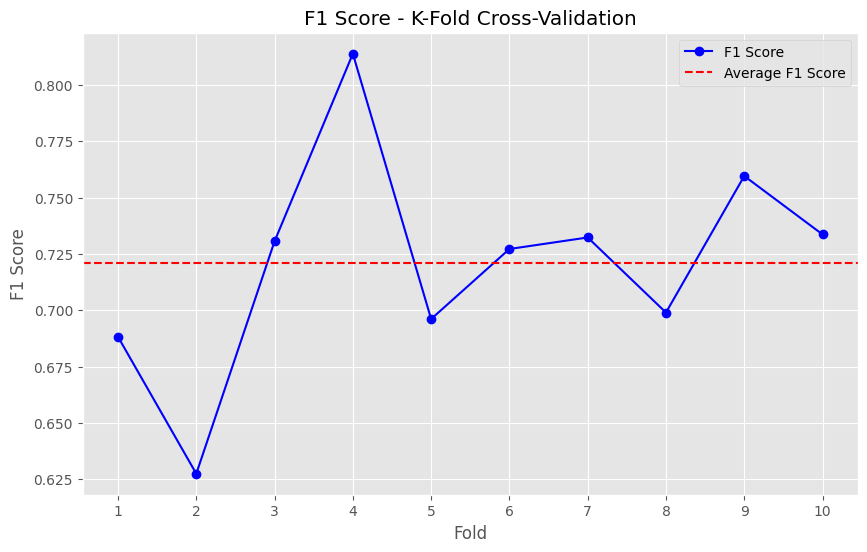

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

final_selected_features_X = X_new.values
final_selected_features_y = y_new

# Perform k-fold cross-validation
n_splits = 10  # You can adjust the number of folds as needed
kf = KFold(n_splits=n_splits, shuffle=True)

f1_scores = []

for train_index, test_index in kf.split(final_selected_features_X):
    X_train, X_test = final_selected_features_X[train_index], final_selected_features_X[test_index]
    y_train, y_test = final_selected_features_y[train_index], final_selected_features_y[test_index]

    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    f1_test_score = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1_test_score)

    print("\nFold Results:")
    print("F1 Score on Test Set:", f1_test_score)

# Calculate and print the average F1 score over all folds
avg_f1_score = sum(f1_scores) / len(f1_scores)
print("\nAverage F1 Score over", n_splits, "folds:", avg_f1_score)

# Visualisasi grafik F1 Score pada setiap lipatan dan rata-rata F1 Score
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_splits + 1), f1_scores, marker='o', linestyle='-', color='b', label='F1 Score')
plt.axhline(y=avg_f1_score, color='r', linestyle='--', label='Average F1 Score')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.title('F1 Score - K-Fold Cross-Validation')
plt.xticks(range(1, n_splits + 1))
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
final_selected_features_X.shape

(1000, 49)


Fold Results:
F1 Score on Test Set: 0.5962637362637362

Fold Results:
F1 Score on Test Set: 0.7418428184281842

Fold Results:
F1 Score on Test Set: 0.729156027192837

Fold Results:
F1 Score on Test Set: 0.8032264569469652

Fold Results:
F1 Score on Test Set: 0.7672572643515239

Fold Results:
F1 Score on Test Set: 0.7569267997580157

Fold Results:
F1 Score on Test Set: 0.7358284600389863

Fold Results:
F1 Score on Test Set: 0.7653116531165312

Fold Results:
F1 Score on Test Set: 0.7245619393013933

Fold Results:
F1 Score on Test Set: 0.6862789384528515

Average F1 Score over 10 folds: 0.7306654093851024


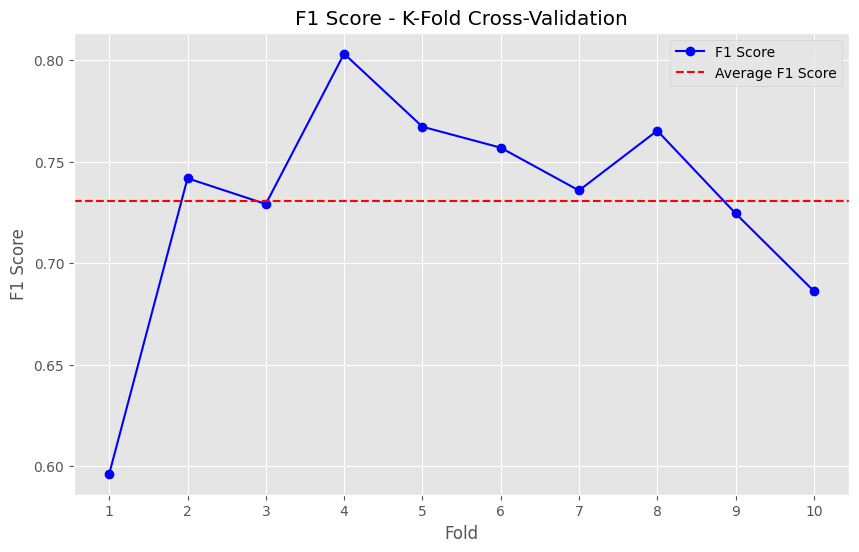

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

final_selected_features_X = X_new.values[:, best_mask]
final_selected_features_y = y_new

# Perform k-fold cross-validation
n_splits = 10  # You can adjust the number of folds as needed
kf = KFold(n_splits=n_splits, shuffle=True)

f1_scores = []

for train_index, test_index in kf.split(final_selected_features_X):
    X_train, X_test = final_selected_features_X[train_index], final_selected_features_X[test_index]
    y_train, y_test = final_selected_features_y[train_index], final_selected_features_y[test_index]

    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    f1_test_score = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1_test_score)

    print("\nFold Results:")
    print("F1 Score on Test Set:", f1_test_score)

# Calculate and print the average F1 score over all folds
avg_f1_score = sum(f1_scores) / len(f1_scores)
print("\nAverage F1 Score over", n_splits, "folds:", avg_f1_score)

# Visualisasi grafik F1 Score pada setiap lipatan dan rata-rata F1 Score
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_splits + 1), f1_scores, marker='o', linestyle='-', color='b', label='F1 Score')
plt.axhline(y=avg_f1_score, color='r', linestyle='--', label='Average F1 Score')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.title('F1 Score - K-Fold Cross-Validation')
plt.xticks(range(1, n_splits + 1))
plt.legend()
plt.grid(True)
plt.show()


F1 Score on Test Set: 0.7334960561671144

Confusion Matrix:
[[180  11]
 [ 46  13]]

Classification Report:
              precision    recall  f1-score   support

           N       0.80      0.94      0.86       191
           Y       0.54      0.22      0.31        59

    accuracy                           0.77       250
   macro avg       0.67      0.58      0.59       250
weighted avg       0.74      0.77      0.73       250



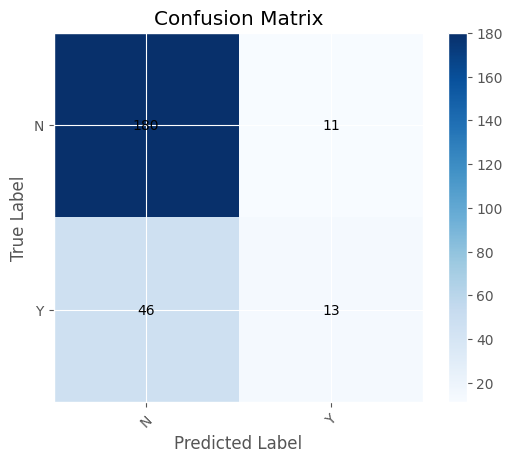

ROC-AUC Score: 0.7568994586919869


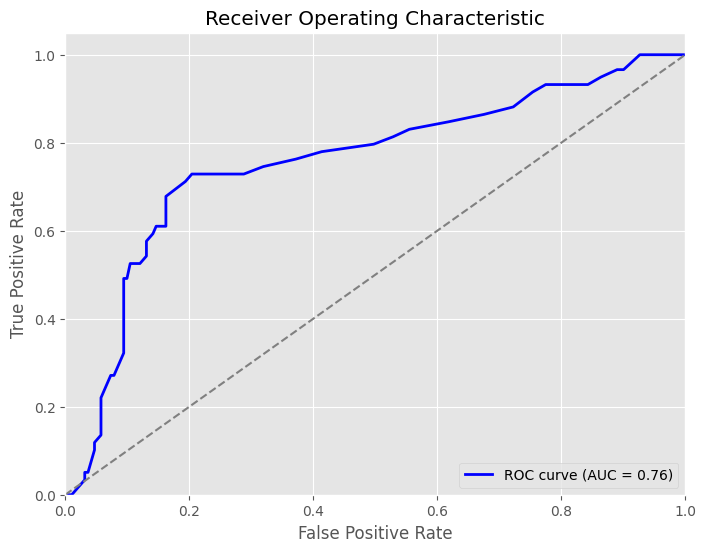

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

# Assume that 'best_mask' contains the indices of the selected features
final_selected_features_X = X_new.values[:, best_mask]
final_selected_features_y = y_new

X_train, X_test, y_train, y_test = train_test_split(final_selected_features_X, final_selected_features_y, test_size=0.25)

# Train the classifier using the selected features
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the F1 score on the test set
f1_test_score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score on Test Set:", f1_test_score)

# Print the classification report
target_names = ['N', 'Y']  # Replace with your class names if needed
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Visualize Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()

# Calculate the ROC-AUC score
y_prob = clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob[:, 1])
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
